<a href="https://colab.research.google.com/github/1myen1e/MaiBlog/blob/main/main4models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/Entire\ Dataset

Mounted at /content/drive
UNSW_2018_IoT_Botnet_Final_10_best.csv


## Preprocessing

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Entire Dataset/UNSW_2018_IoT_Botnet_Final_10_best.csv")
print("Length of data: ",len(data))
print("Dtype: ", data.dtypes)
print(data.describe())
print(data.head())

Length of data:  3668522
Dtype:  pkSeqID                int64
proto                 object
saddr                 object
sport                 object
daddr                 object
dport                 object
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
category              object
subcategory           object
dtype: object
            pkSeqID           seq        stddev  N_IN_Conn_P_SrcIP  \
count  3.668522e+06  3.668522e+06  3.668522e+06       3.668522e+06   
mean   1.834262e+06  1.213204e+05  8.871499e-01       8.253848e+01   
std    1.059011e+06  7.579428e+04  8.037139e-01       2.439739e+01   
min    1.000000e+00  1.000000e+00  0.000000e+00       1.000000e+00   
25%    9.171312e+05  5.487600e+04  3.001900e-02     

In [5]:
df = data.drop(['pkSeqID','subcategory','attack','dport','sport'],axis=1)

print(df.head())

  proto            saddr          daddr     seq    stddev  N_IN_Conn_P_SrcIP  \
0   udp  192.168.100.150  192.168.100.3  251984  1.900363                100   
1   tcp  192.168.100.150  192.168.100.3  256724  0.078003                 38   
2   tcp  192.168.100.147  192.168.100.3   62921  0.268666                100   
3   udp  192.168.100.150  192.168.100.3   99168  1.823185                 63   
4   udp  192.168.100.147  192.168.100.3  105063  0.822418                100   

        min  state_number      mean  N_IN_Conn_P_DstIP  drate     srate  \
0  0.000000             4  2.687519                100    0.0  0.494549   
1  3.856930             3  3.934927                100    0.0  0.256493   
2  2.974100             3  3.341429                100    0.0  0.294880   
3  0.000000             4  3.222832                 63    0.0  0.461435   
4  2.979995             4  3.983222                100    0.0  1.002999   

        max category  
0  4.031619     DDoS  
1  4.012924     DDoS  

In [6]:
encoder1 = ce.BinaryEncoder(cols=['saddr'],return_df=True)
df = encoder1.fit_transform(df)

encoder2 = ce.BinaryEncoder(cols=['daddr'],return_df=True)
df = encoder2.fit_transform(df)

proto_encoded = pd.get_dummies(data=df['proto'],drop_first=True)

print(proto_encoded);

df = pd.concat([df,proto_encoded],axis=1)
df.drop('proto',axis=1,inplace=True)

print(df.dtypes)

          icmp  ipv6-icmp    tcp    udp
0        False      False  False   True
1        False      False   True  False
2        False      False   True  False
3        False      False  False   True
4        False      False  False   True
...        ...        ...    ...    ...
3668517  False      False  False   True
3668518  False      False  False   True
3668519  False      False   True  False
3668520  False      False   True  False
3668521  False      False   True  False

[3668522 rows x 4 columns]
saddr_0                int64
saddr_1                int64
saddr_2                int64
saddr_3                int64
saddr_4                int64
daddr_0                int64
daddr_1                int64
daddr_2                int64
daddr_3                int64
daddr_4                int64
daddr_5                int64
daddr_6                int64
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64

In [7]:
scaler = StandardScaler()
X = df.drop('category',axis=1)
y = df['category']
X = scaler.fit_transform(X)

print('X', X)
print('Y', y)

X [[-0.00295346 -0.00522108 -0.58571343 ... -0.00147673 -0.91051584
   0.91516915]
 [-0.00295346 -0.00522108 -0.58571343 ... -0.00147673  1.09827853
  -1.09269418]
 [-0.00295346 -0.00522108 -0.58571343 ... -0.00147673  1.09827853
  -1.09269418]
 ...
 [-0.00295346 -0.00522108 -0.58571343 ... -0.00147673  1.09827853
  -1.09269418]
 [-0.00295346 -0.00522108 -0.58571343 ... -0.00147673  1.09827853
  -1.09269418]
 [-0.00295346 -0.00522108 -0.58571343 ... -0.00147673  1.09827853
  -1.09269418]]
Y 0          DDoS
1          DDoS
2          DDoS
3           DoS
4          DDoS
           ... 
3668517     DoS
3668518    DDoS
3668519    DDoS
3668520     DoS
3668521    DDoS
Name: category, Length: 3668522, dtype: object


## Logistic Regression

chạy nhanh, 2m là xong rồi

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=109)

clf = LogisticRegression(random_state=0, multi_class='multinomial').fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test,predictions))
print("Classification report \n",classification_report(y_test,predictions,digits=6, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test,predictions))

Accuracy Score:  0.986883914236155
Classification report 
                 precision    recall  f1-score   support

          DDoS   0.994631  0.985288  0.989937    577609
           DoS   0.982545  0.996561  0.989503    495252
        Normal   0.892857  0.838926  0.865052       149
Reconnaissance   0.901147  0.847755  0.873636     27528
         Theft   0.000000  0.000000  0.000000        19

      accuracy                       0.986884   1100557
     macro avg   0.754236  0.733706  0.743626   1100557
  weighted avg   0.986823  0.986884  0.986799   1100557

Confusion Matrix:
 [[569111   7236      0   1262      0]
 [   407 493549      1   1293      2]
 [    13      8    125      3      0]
 [  2643   1516     14  23337     18]
 [     9      8      0      2      0]]


## Artificial Neural Networks


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
# Added import for accuracy_score, classification_report, and confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np # make sure to import numpy for np.argmax

ohe = OneHotEncoder()
y = df['category'].values

y = ohe.fit_transform(y.reshape(-1,1)).toarray()

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=109)

model = Sequential()
# Changed input_dim to 26 to match the actual number of features in X_train
model.add(Dense(16, input_dim=26, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=256)

y_pred = model.predict(X_test)

pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))


print('Accuracy:', accuracy_score(test, pred))

print("Classification report:\n", classification_report(test, pred, digits=6))
print("Confusion Matrix:\n", confusion_matrix(test, pred))

Epoch 1/100
10032/10032 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9503 - loss: 0.1518
Epoch 2/100
10032/10032 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9916 - loss: 0.0216
Epoch 3/100
10032/10032 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9926 - loss: 0.0181
Epoch 4/100
10032/10032 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9937 - loss: 0.0160
Epoch 5/100
10032/10032 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9945 - loss: 0.0140
Epoch 6/100
10032/10032 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9950 - loss: 0.0129
Epoch 7/100
10032/10032 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9954 - loss: 0.0121
Epoch 8/100
10032/10032 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9956 - loss: 0.0117
Epoch 9/100
10032/10032 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9959 - loss: 0.0109
Epoch 10/100
10032/10032 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9960 - loss: 0.0103
Epoch 11/100
10032/10032 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9961 -

## Decision Tree Classifier with GridSearch

In [11]:
X = df.drop('category',axis=1)
y = df['category']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=109)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dec = DecisionTreeClassifier()
params = {'max_depth':(1,2,3,10,100,1000)}
grid_search_dec = GridSearchCV(dec, params, cv=5, verbose=10, n_jobs=-1)
grid_search_dec.fit(X_train, Y_train)

print(grid_search_dec.best_params_)

y_pred = grid_search_dec.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, y_pred))
print("Classification report:\n", classification_report(Y_test, y_pred, digits=6))
dct = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'max_depth': 1000}
Accuracy: 0.9999309440583268
Classification report:
                 precision    recall  f1-score   support

          DDoS   0.999952  0.999971  0.999961    577609
           DoS   0.999943  0.999960  0.999952    495252
        Normal   0.957447  0.906040  0.931034       149
Reconnaissance   0.999564  0.999092  0.999328     27528
         Theft   0.904762  1.000000  0.950000        19

      accuracy                       0.999931   1100557
     macro avg   0.972334  0.981012  0.976055   1100557
  weighted avg   0.999931  0.999931  0.999931   1100557

Confusion Matrix:
 [[577592     13      1      3      0]
 [    17 495232      2      1      0]
 [     4      2    135      8      0]
 [     7     13      3  27503      2]
 [     0      0      0      0     19]]


## Random Forest Classifier with GridsearchCV

In [13]:
from sklearn.ensemble import RandomForestClassifier
randForest = RandomForestClassifier()
params = {'max_depth':(1,2,9,10),'n_estimators':(10,15,30)}
grid_search = GridSearchCV(randForest, params, cv=5, verbose=10)
grid_search.fit(X_train, Y_train)

y_pred = grid_search.predict(X_test)

print(grid_search.best_params_)

print('Accuracy:', accuracy_score(Y_test, y_pred))
print("Classification report: \n",classification_report(Y_test,y_pred,digits=6))
print("Confusion Matrix:\n ", confusion_matrix(Y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=1, n_estimators=10...............................
[CV 1/5; 1/12] END max_depth=1, n_estimators=10;, score=0.823 total time=  19.8s
[CV 2/5; 1/12] START max_depth=1, n_estimators=10...............................
[CV 2/5; 1/12] END max_depth=1, n_estimators=10;, score=0.849 total time=  17.7s
[CV 3/5; 1/12] START max_depth=1, n_estimators=10...............................
[CV 3/5; 1/12] END max_depth=1, n_estimators=10;, score=0.853 total time=  17.2s
[CV 4/5; 1/12] START max_depth=1, n_estimators=10...............................
[CV 4/5; 1/12] END max_depth=1, n_estimators=10;, score=0.800 total time=  16.4s
[CV 5/5; 1/12] START max_depth=1, n_estimators=10...............................
[CV 5/5; 1/12] END max_depth=1, n_estimators=10;, score=0.839 total time=  15.7s
[CV 1/5; 2/12] START max_depth=1, n_estimators=15...............................
[CV 1/5; 2/12] END max_depth=1, n_estimators=15;

## Confusion Matrix

In [4]:
import numpy as np

confusion_matrices = {
    'Logistic Regression': np.array([[569111, 7236, 0, 1262, 0],
                                                  [407, 493549, 1, 1293, 2],
                                                  [13, 8, 125, 3, 0],
                                                  [2643, 1516, 14, 23337, 18],
                                                  [9, 8, 0, 2, 0]]),

    'Artificial Neural Networks': np.array([[576171, 321, 0, 1117, 0],
                                            [82, 495112, 1, 57, 0],
                                            [3, 0, 141, 5, 0],
                                            [169, 53, 6, 27299, 1],
                                            [11, 2, 0, 1, 5]]),

    'Decision Tree Classifier': np.array([[577592, 13, 1, 3, 0],
                                          [17, 495232, 2, 1, 0],
                                          [4, 2, 135, 8, 0],
                                          [7, 13, 3, 27503, 2],
                                          [0, 0, 0, 0, 19]]),

    'Random Forest Classifier': np.array([[576953, 656, 0, 0, 0],
                                          [365, 494884, 0, 3, 0],
                                          [0, 1, 142, 6, 0],
                                          [13, 2, 0, 27513, 0],
                                          [0, 0, 0, 3, 16]])
}

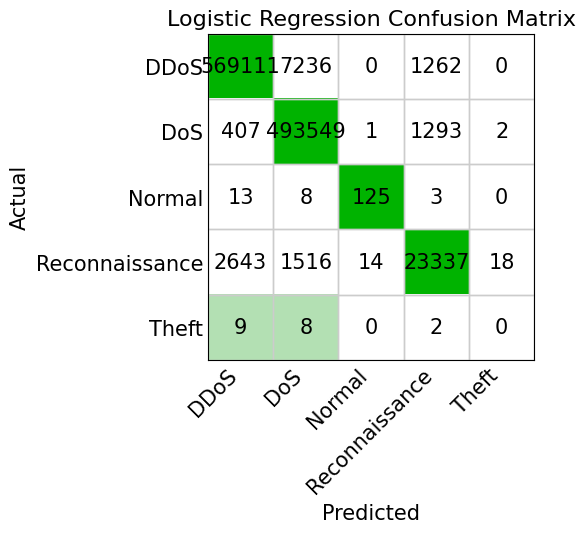

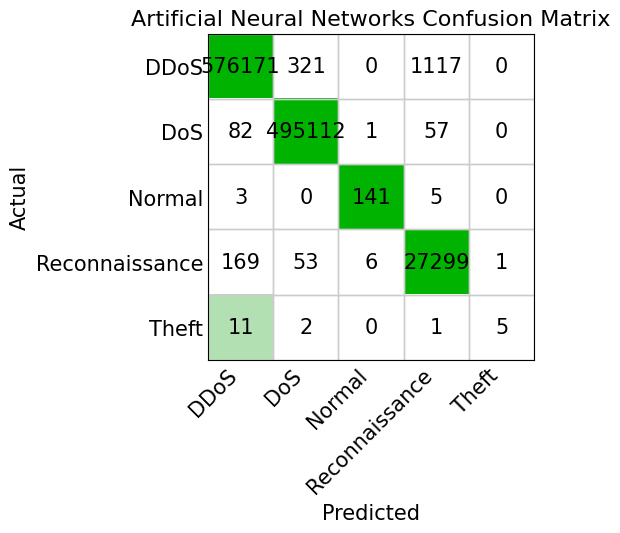

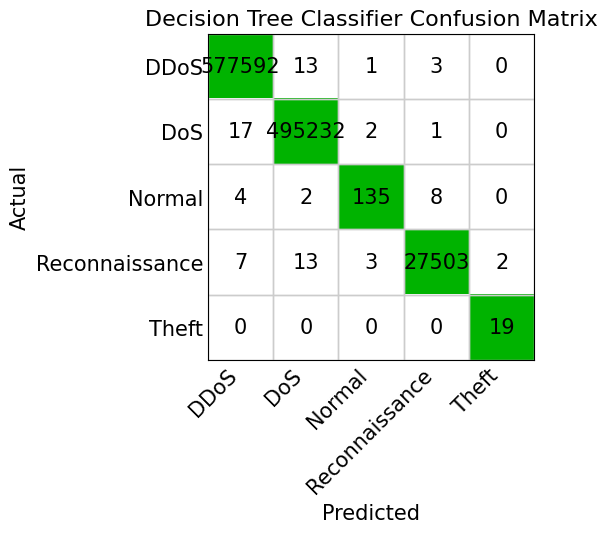

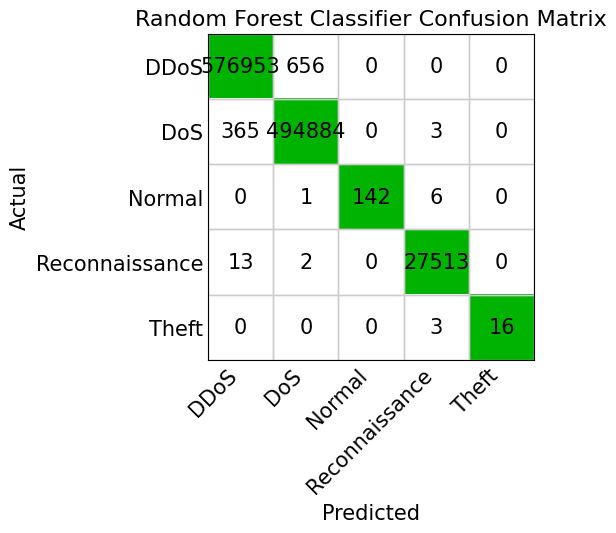

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize

for model in ["Logistic Regression","Artificial Neural Networks","Decision Tree Classifier","Random Forest Classifier"]:

    # Define the confusion matrix
    conf_matrix = np.array(confusion_matrices[model])

    # Normalize the values in each row
    norm_conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

    # Define the color map
    cmap = ListedColormap(['white', '#b3e0b3', '#00b300'])
    #cmap = plt.cm.get_cmap('viridis')

    # Plot the confusion matrix as a colored table
    fig, ax = plt.subplots()
    im = ax.imshow(norm_conf_matrix, cmap=cmap)

    # Adjust subplot layout
    fig.subplots_adjust(bottom=0.2, right=0.8)

    # Set the axis labels with rotated x labels
    ax.set_xticks(np.arange(5))
    ax.set_yticks(np.arange(5))
    ax.set_xticklabels(['DDoS', 'DoS', 'Normal', 'Reconnaissance', 'Theft'], rotation=45, ha="right", fontsize=15)
    ax.set_yticklabels(['DDoS', 'DoS', 'Normal', 'Reconnaissance', 'Theft'], fontsize=15)
    ax.tick_params(axis='both', which='both', length=0)

    # Use the normalized values only for colouring cells
    # Add the values inside the cells
    for i in range(5):
        for j in range(5):
            text = ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black", fontsize=15)

    # Set the cell border color to gray
    for i in range(5):
        for j in range(5):
            cell = im.axes.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor='#cccccc'))


    # Set the plot title
    ax.set_title((model+" Confusion Matrix"), fontsize=16)

    # Add axis labels
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)

    # Show the colorbar
    #cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    #cbar.set_label('Normalized Values', fontsize=12)

    # Show the plot
    plt.show()

## Classification report

In [14]:
# Classification reports for each model
reports = {
    "Logistic Regression": {
        0: {'precision': 0.994631, 'recall': 0.985288, 'f1-score': 0.989937, 'support': 577609},
        1: {'precision': 0.982545, 'recall': 0.996561, 'f1-score': 0.989503, 'support': 495252},
        2: {'precision': 0.892857, 'recall': 0.838926, 'f1-score': 0.865052, 'support': 149},
        3: {'precision': 0.901147, 'recall': 0.847755, 'f1-score': 0.873636, 'support': 27528},
        4: {'precision': 0.000000, 'recall': 0.000000, 'f1-score': 0.000000, 'support': 19}
    },
    "Artificial Neural Network": {
        0: {'precision': 0.999540, 'recall': 0.997510, 'f1-score': 0.998524, 'support': 577609},
        1: {'precision': 0.999241, 'recall': 0.999717, 'f1-score': 0.999479, 'support': 495252},
        2: {'precision': 0.952703, 'recall': 0.946309, 'f1-score': 0.949495, 'support': 149},
        3: {'precision': 0.958566, 'recall': 0.991681, 'f1-score': 0.974842, 'support': 27528},
        4: {'precision': 0.833333, 'recall': 0.263158, 'f1-score': 0.400000, 'support': 19}
    },
    "Decision Tree Classifier": {
        0: {'precision': 0.999952, 'recall': 0.999971, 'f1-score': 0.999961, 'support': 577609},
        1: {'precision': 0.999943, 'recall': 0.999960, 'f1-score': 0.999952, 'support': 495252},
        2: {'precision': 0.957447, 'recall': 0.906040, 'f1-score': 0.931034, 'support': 149},
        3: {'precision': 0.999564, 'recall': 0.999092, 'f1-score': 0.999328, 'support': 27528},
        4: {'precision': 0.904762, 'recall': 1.000000, 'f1-score': 0.950000, 'support': 19}
    },
    "Random Forest Classifier": {
        0: {'precision': 0.999345, 'recall': 0.998864, 'f1-score': 0.999105, 'support': 577609},
        1: {'precision': 0.998670, 'recall': 0.999257, 'f1-score': 0.998963, 'support': 495252},
        2: {'precision': 1.000000, 'recall': 0.953020, 'f1-score': 0.975945, 'support': 149},
        3: {'precision': 0.999564, 'recall': 0.999455, 'f1-score': 0.999510, 'support': 27528},
        4: {'precision': 1.000000, 'recall': 0.842105, 'f1-score': 0.914286, 'support': 19}
    }
}


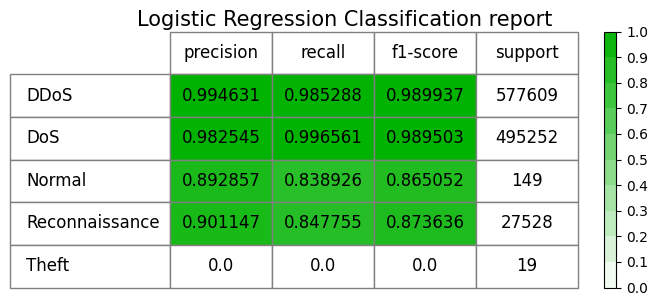

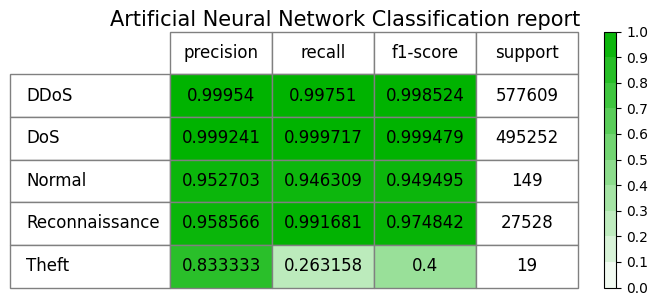

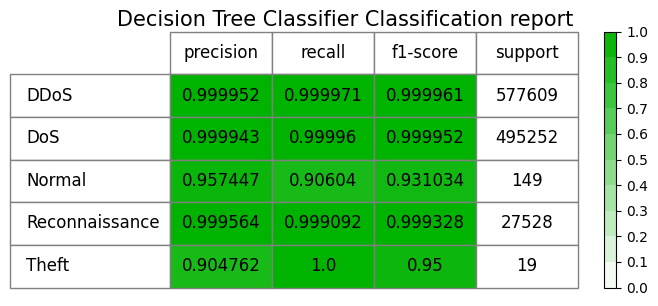

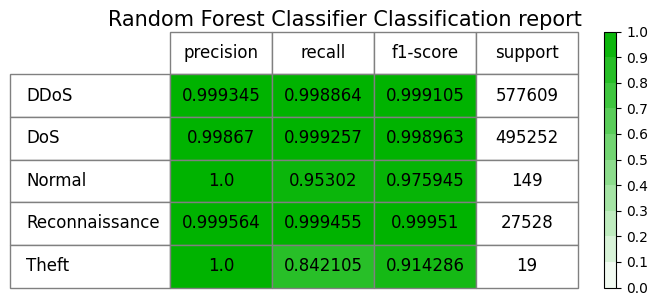

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

for model in ["Logistic Regression","Artificial Neural Network","Decision Tree Classifier","Random Forest Classifier"]:
    # Example classification report values
    report = reports[model]

    # Define the starting and ending colors
    start_color = '#00b300'  # green
    end_color = '#FFFFFF'    # pure white

    # Generate the color map
    cmap_colors = []
    for i in range(1000):
        r = int(((999 - i) / 999) * int(end_color[1:3], 16) + (i / 999) * int(start_color[1:3], 16))
        g = int(((999 - i) / 999) * int(end_color[3:5], 16) + (i / 999) * int(start_color[3:5], 16))
        b = int(((999 - i) / 999) * int(end_color[5:], 16) + (i / 999) * int(start_color[5:], 16))
        cmap_colors.append(f'#{r:02X}{g:02X}{b:02X}')

    cmap = ListedColormap(cmap_colors[:len(cmap_colors) - 1])

    columns = ['precision','recall', 'f1-score', 'support']
    classes = ['DDoS', 'DoS', 'Normal', 'Reconnaissance', 'Theft']

    # Create a table with the values
    cell_text = []
    for row in range(len(classes)):
        cell_text.append([report[row][column] for column in columns])

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')

    # Add the topic label
    fig.text(0.5, 0.95, (model+" Classification report"), fontsize=15, ha='center')  ## see line 4 for model

    # Create the table and format it
    table = ax.table(cellText=cell_text,
                        colLabels=columns,
                        rowLabels=classes,
                        cellLoc='center',
                        bbox=[0, 0, 1, 1],
                        colWidths=[0.2, 0.2, 0.2, 0.2],
                        cellColours=[[cmap_colors[0]] * len(columns)] + [[cmap_colors[1]] * len(columns)] + [[cmap_colors[2]] * len(columns)]+ [[cmap_colors[3]] * len(columns)]+ [[cmap_colors[4]] * len(columns)])

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    # Adjust cell padding and font properties
    for key, cell in table.get_celld().items():
        cell.set_text_props()
        if key[0] == 0:
            cell.set_fontsize(12)
        else:
            cell.set_fontsize(12)
        cell.set_height(0.15)
        cell.set_edgecolor('gray')

    # Color the cells using the colormap (for the first 3 columns)
    for i, key in enumerate(columns[:3]):
        cell_values = np.array([report[row][key] for row in range(len(classes))])
        colors = cmap(cell_values / cell_values.max())
        for j in range(len(classes)):
            table.get_celld()[j+1, i].set_facecolor(colors[j])

    # Set the last column background color to white
    for j in range(len(classes)):
        table.get_celld()[j+1, len(columns)-1].set_facecolor('white')

    # Add a colorbar with decimal number labels
    colorbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, boundaries=np.linspace(0, 1, 11))  # Use 11 boundaries for 10 bands
    colorbar.set_ticks(np.linspace(0, 1, 11))
    colorbar.set_ticklabels( [f'{i:.1f}' for i in np.linspace(0, 1, 11)])
    colorbar.ax.yaxis.set_ticks_position('right')
    colorbar.ax.tick_params(axis='y', labelsize=10)  # Set the font size of the color bar labels

    # Display the figure
    plt.tight_layout()
    plt.show()

# Accuracy Graph

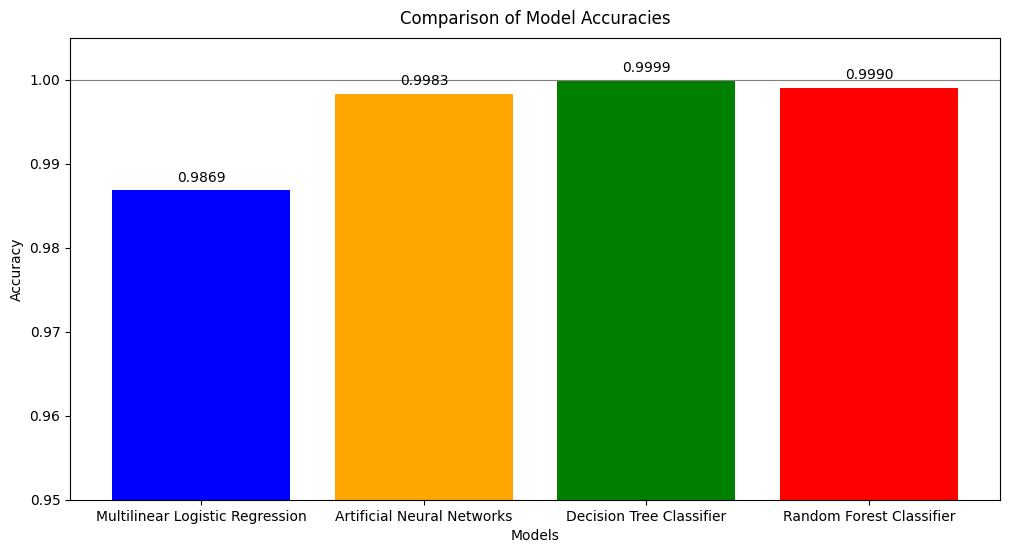

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Multilinear Logistic Regression', 'Artificial Neural Networks', 'Decision Tree Classifier', 'Random Forest Classifier']

accuracies = [0.986883914236155, 0.9983381142457864, 0.9999309440583268, 0.999046846278748]

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])

# Set y-axis range
plt.ylim(0.95, 1.005)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies', pad=10)  # Set pad to move title above 1.0


# Display the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.001, f'{accuracy:.4f}', ha='center')

plt.axhline(y=1.0, color='gray', linestyle='-', linewidth=0.8)

# Show the plot
plt.show()